In [1]:
import nbsetup
import ergodicpy as ep
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
from simulations.snowflake.models import Snowflake
import matplotlib.pyplot as plt

In [36]:
# generate the reference ensembles (histograms)
ensembles = 20
spikes = 2
models = []
for i in range(ensembles):
    nbsetup.cp(ensembles-i)
    models.append(Snowflake(plot=False, spikes=spikes))

1


In [37]:
states = 90
histograms = [s.histogram(states=states) for s in models]
ec = ep.ErgodicCollection(histograms)
ec.complexity

0.29491130011782934

In [38]:
# generate the new snowflake
nbsetup.cp('gen snowflake')
s = Snowflake(plot=False, spikes=spikes)
final_pmf = s.histogram(states=states)
ergodic_pmf = ec.ergodic_pmf()

gen snowflake


In [52]:
data = []
for d in range(0, s.steps, 20):
    nbsetup.cp(d)
    current_pmf = s.histogram(states=states, at_point=d)
    swarm_pmf = ec.swarm_pmf(current_pmf)
    
    compare = sp.spatial.distance.jensenshannon
    #compare = sp.stats.entropy
    
    data.append({
        'step': d,
        'actual difference (current x final)': compare(current_pmf, final_pmf),
        'swarm (swarm x final)': compare(swarm_pmf, final_pmf),
        'frequentist (ergodic x final)': compare(ergodic_pmf, final_pmf),
    })

880


<AxesSubplot:xlabel='step', ylabel='value'>

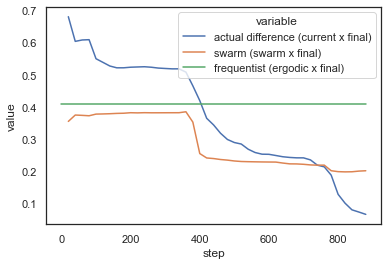

In [53]:
df = pd.DataFrame(data=data)
sns.lineplot(data=df.melt(id_vars=['step']), x='step', y='value', hue='variable')

In [41]:
def swarm_plot(ec, histogram):
    self = ec
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15,5))
    observed_obs = ep.ergodic.histogram_to_observations(histogram)
    sns.histplot(data=observed_obs, bins=self.bins, ax=axes[0], stat='probability')
    
    swarm_hist = self.swarm_pmf(histogram)
    swarm_obs = ep.ergodic.histogram_to_observations(swarm_hist)
    sns.histplot(data=swarm_obs, bins=self.bins, ax=axes[1], stat='probability')

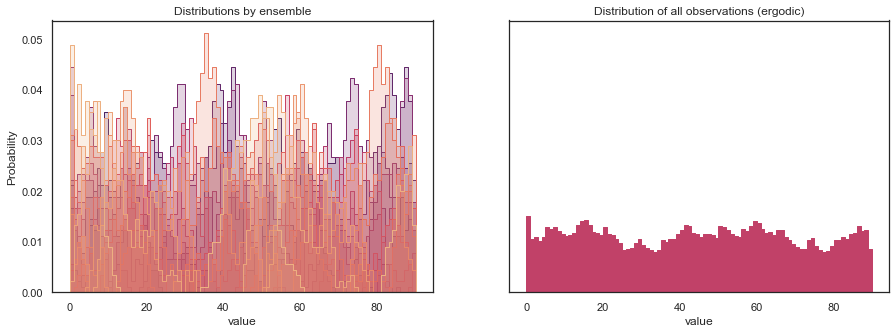

In [42]:
ec.plot()

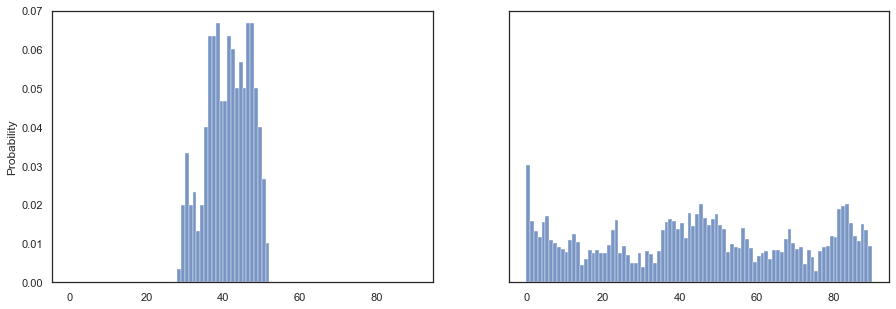

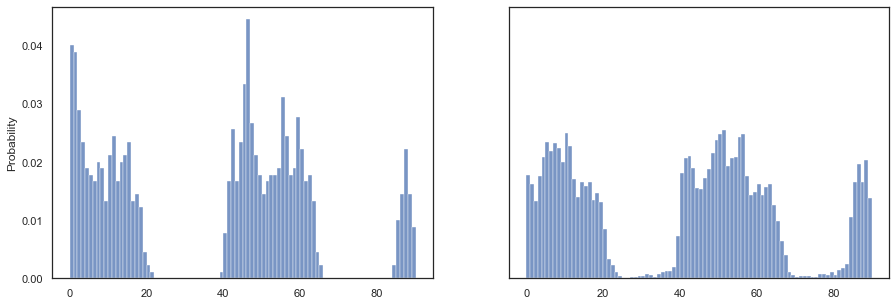

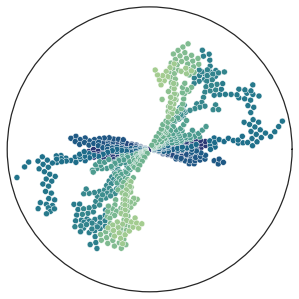

In [43]:
swarm_plot(ec, tester_pmf)
swarm_plot(ec, final_pmf)
s.plot()

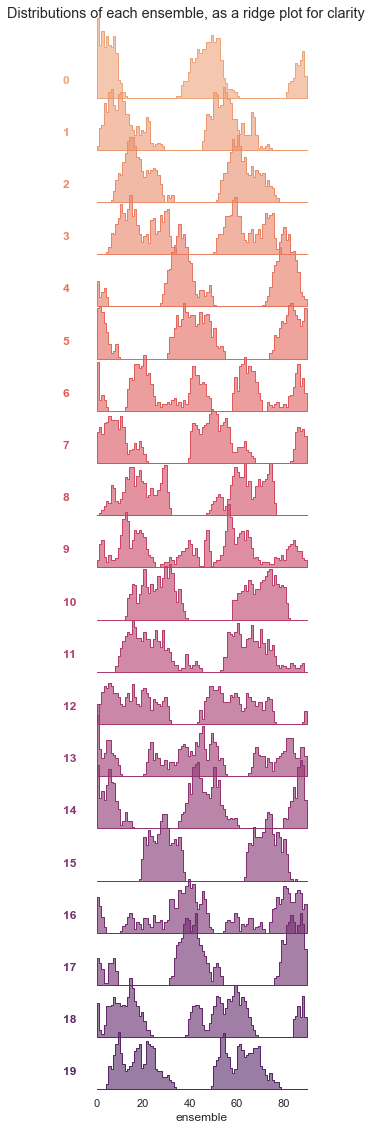

In [44]:
ec.ridge()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

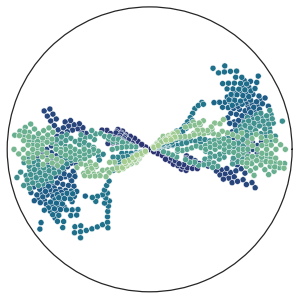

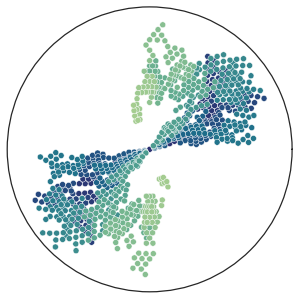

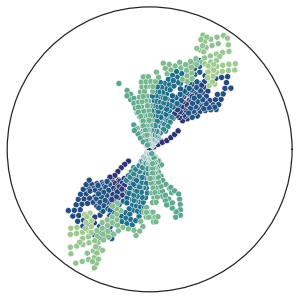

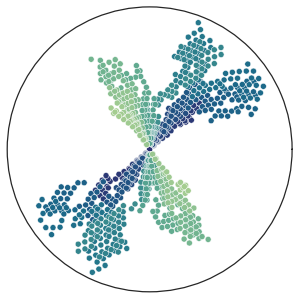

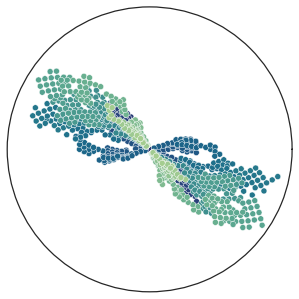

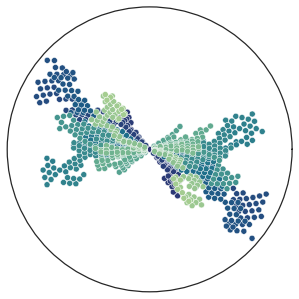

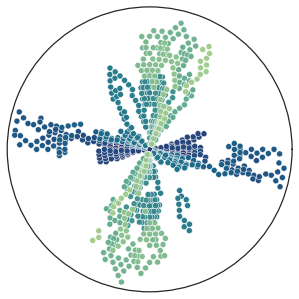

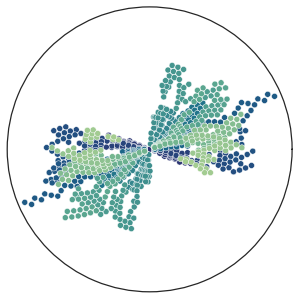

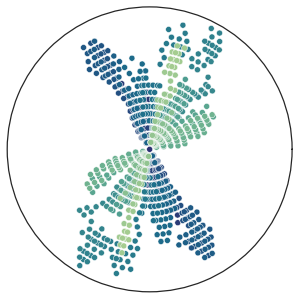

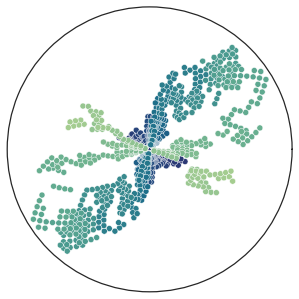

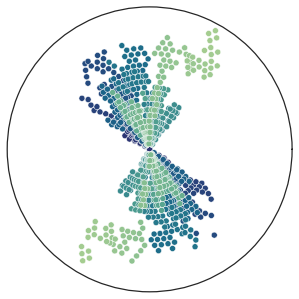

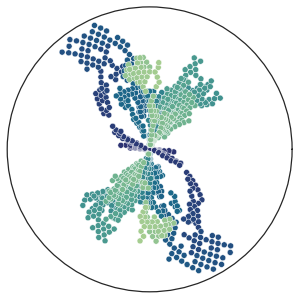

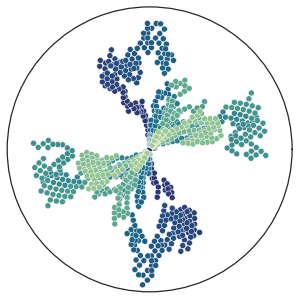

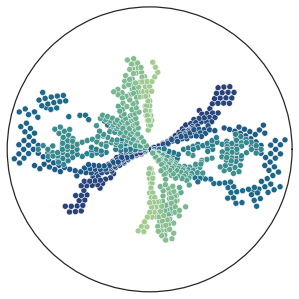

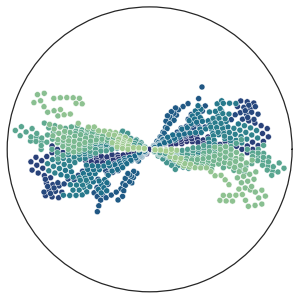

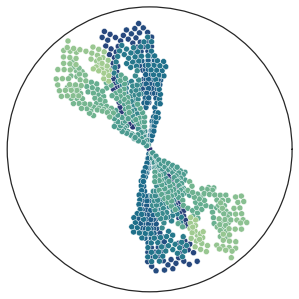

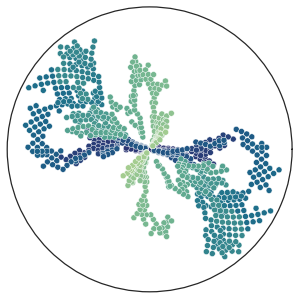

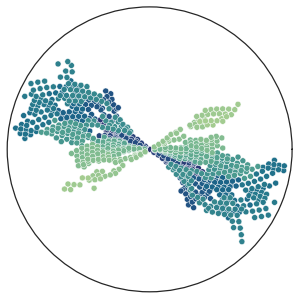

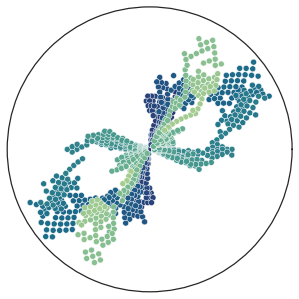

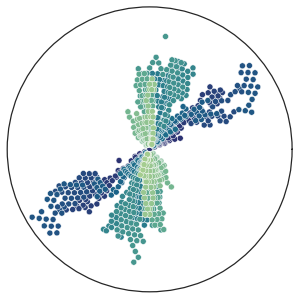

In [45]:
[m.plot() for m in models]